# SalishSeaCast Domain + Ariane CS plot
based on Ben's code from https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, geo_tools

# import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

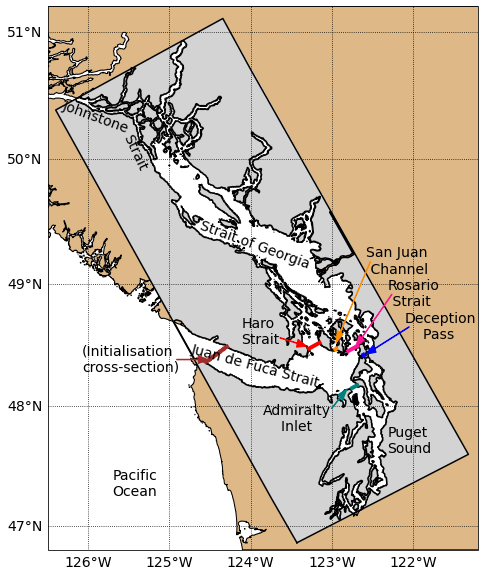

In [2]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# Overlay domain landmask and coastline
ax.contourf(grid.nav_lon, grid.nav_lat,mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',transform=crs.PlateCarree(), zorder =2)
ax.contour(grid.nav_lon, grid.nav_lat,mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',transform=crs.PlateCarree(), zorder=2)

# Draw box around domain
lons, lats = [], []
corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Add cross-sections
a = [grid.nav_lon[204,255],grid.nav_lon[204,267],grid.nav_lat[204,255],grid.nav_lat[204,267]]
d = [grid.nav_lon[246,309],grid.nav_lon[247,309],grid.nav_lat[246,309],grid.nav_lat[247,309]]
r = [grid.nav_lon[266,286],grid.nav_lon[266,307],grid.nav_lat[266,286],grid.nav_lat[266,307]]
s = [grid.nav_lon[280,264],grid.nav_lon[280,266],grid.nav_lat[280,264],grid.nav_lat[280,266]]
h = [grid.nav_lon[304,218],grid.nav_lon[304,242],grid.nav_lat[304,218],grid.nav_lat[304,242]]
ax.plot([a[0],a[1]],[a[2],a[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='teal')
ax.plot([d[0],d[1]],[d[2],d[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='b')
ax.plot([r[0],r[1]],[r[2],r[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='deeppink')
ax.plot([s[0],s[1]],[s[2],s[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='darkorange')
ax.plot([h[0],h[1]],[h[2],h[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='r')

# Add annoying JDF CS
nums = [[374,18],[374,27],[375,27],[375,36],[376,36],[376,45],[377,45],[377,54],[378,54],[378,63],[379,63],[379,71]]
jr_lat = [grid.nav_lat[i[0],i[1]] for i in nums]
jr_lon = [grid.nav_lon[i[0],i[1]] for i in nums]
ax.plot(jr_lon, jr_lat,zorder=11,transform=crs.PlateCarree(),lw=4,c='brown')

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', transform=ax.transAxes, rotation=-15,zorder = 11)
ax.text(0.35, 0.52, 'Strait of Georgia', transform=ax.transAxes, rotation=-20)
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.70, 'Strait', transform=ax.transAxes, rotation=-65)
ax.text(0.45, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.50, 0.22, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.79, 0.45, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.39, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.74, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.08,0.33,'(Initialisation\ncross-section)', transform=ax.transAxes)
ax.arrow(0.54, 0.39, 0.04, -0.01, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.53, -0.07, -0.13, head_width=0.015, edgecolor='darkorange', facecolor='darkorange', transform=ax.transAxes, zorder=10)
ax.arrow(0.80, 0.47, -0.07, -0.08, head_width=0.015, edgecolor='deeppink', facecolor='deeppink', transform=ax.transAxes, zorder=10)
ax.arrow(0.84, 0.41, -0.08, -0.04, head_width=0.015, edgecolor='b', facecolor='b', transform=ax.transAxes, zorder=10)
ax.arrow(0.66, 0.26, 0.02, 0.02, head_width=0.015, edgecolor='teal', facecolor='teal', transform=ax.transAxes, zorder=10)
ax.arrow(0.3,0.35,0.05,0, head_width=0.015, edgecolor='brown', facecolor='brown', transform=ax.transAxes, zorder=10)


In [ ]:
# for thesis i think best to zoom in more on study area for showing the ariance cross-sections
# i will have a plot earlier of the whole salish sea



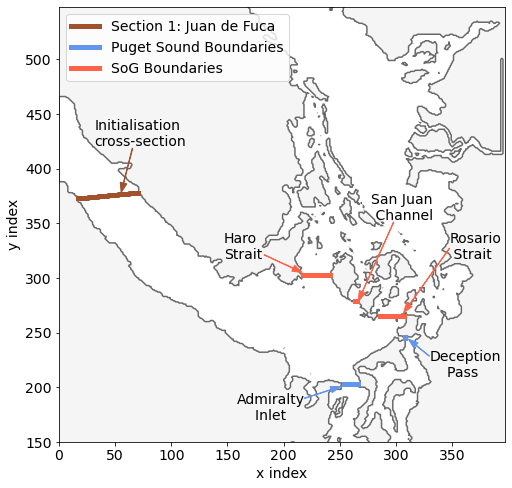

In [109]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
# grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylim([150,548])

# Add cross-sections
ax.plot([17,26,26,26,26,35,35,35,35,44,44,44,44,53,53,53,53,62,62,62,62,70],[373,373,373,374,374,374,374,375,375,375,375,376,376,376,376,377,377,377,377,378,378,378], lw=5, c='sienna', label = "Section 1: Juan de Fuca")
ax.plot([254,266],[203,203], lw=5, c='cornflowerblue', label = "Puget Sound Boundaries")
ax.plot([308,308],[245,246], lw=5, c='cornflowerblue')
ax.plot([286,307],[265,265], lw=5, c='tomato', label = "SoG Boundaries")
ax.plot([263,265],[279,279], lw=5, c='tomato')
ax.plot([217,241],[303,303], lw=5, c ='tomato')
ax.legend(loc='upper left')
ax.set_ylabel('y index')
ax.set_xlabel('x index')

ax.text(0.37, 0.42, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.4, 0.05, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.875, 0.42, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.15, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.7, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.08,0.68,'Initialisation\ncross-section', transform=ax.transAxes)
ax.arrow(0.46, 0.43, 0.065, -0.031, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.505, -0.07, -0.16, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.875, 0.445, -0.09, -0.13, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.83, 0.197, -0.03, 0.025, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.55, 0.1, 0.06, 0.02, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.165,0.675,-0.02,-0.08, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)


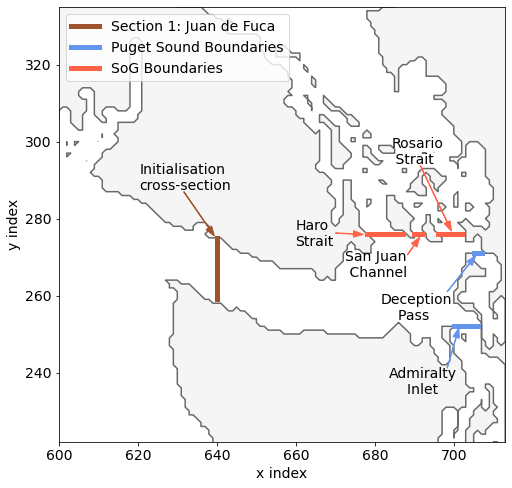

In [146]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([222,335])
ax.set_xlim([600,713])

# Add cross-sections
ax.plot([640,640],[259,275], lw=5, c='sienna', label = "Section 1: Juan de Fuca")
ax.plot([700,706],[252,252], lw=5, c='cornflowerblue', label = "Puget Sound Boundaries")
ax.plot([705,707],[271,271], lw=5, c='cornflowerblue')
ax.plot([696,702],[276,276], lw=5, c='tomato', label = "SoG Boundaries")
ax.plot([690,692],[276,276], lw=5, c='tomato')
ax.plot([678,687],[276,276], lw=5, c ='tomato')
ax.legend(loc='upper left')
ax.set_ylabel('y index')
ax.set_xlabel('x index')

ax.text(0.53, 0.45, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.74, 0.11, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.745, 0.64, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.72, 0.28, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.64, 0.38, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.18,0.58,'Initialisation\ncross-section', transform=ax.transAxes)
ax.arrow(0.62, 0.48, 0.04, -0.002, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.81, 0.635, 0.06, -0.13, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.781, 0.43, 0.015, 0.022, head_width=0.015, edgecolor='tomato', facecolor='tomato', transform=ax.transAxes, zorder=10)
ax.arrow(0.87, 0.345, 0.05, 0.065, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.87, 0.17, 0.02, 0.07, head_width=0.015, edgecolor='cornflowerblue', facecolor='cornflowerblue', transform=ax.transAxes, zorder=10)
ax.arrow(0.28,0.575,0.056,-0.083, head_width=0.015, edgecolor='sienna', facecolor='sienna', transform=ax.transAxes, zorder=10)


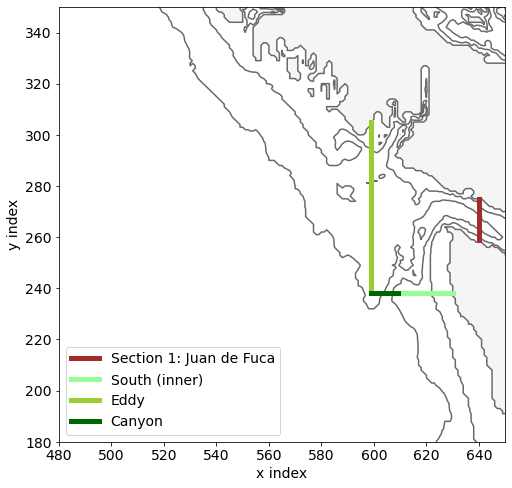

In [163]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,350])
ax.set_xlim([480,650])
ax.set_ylabel('y index')
ax.set_xlabel('x index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[200,300],extend='max', colors='dimgrey')
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# inner (susan):
ax.plot([640,640],[259,275], lw=5, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([609,630],[238,238], 'palegreen',linewidth=5, label='South (inner)')
ax.plot([599,599],[238,305], 'yellowgreen',linewidth=5, label='Eddy')
ax.plot([609,599],[238,238], 'darkgreen',linewidth=5, label='Canyon')
ax.legend(loc='lower left')

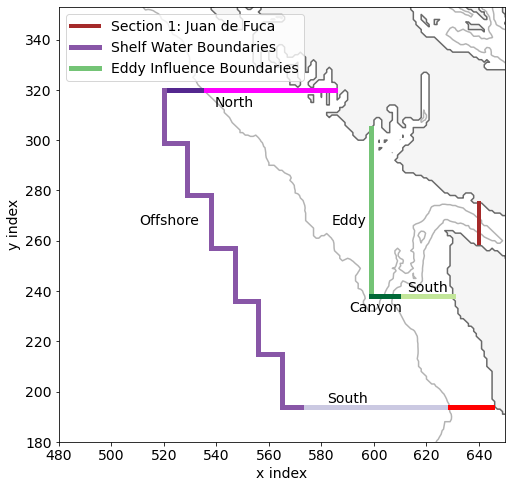

In [10]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,353])
ax.set_xlim([480,650])
ax.set_ylabel('y index')
ax.set_xlabel('x index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[300],extend='max', colors='dimgrey', alpha=0.5)
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([534,585],[320,320], 'magenta',linewidth=5)#, label='North')
ax.plot([520,534],[320,320], '#54278f',linewidth=5)#, label='North')
ax.plot([520,520],[320,299], '#8856a7',linewidth=5, label='Shelf Water Boundaries')
ax.plot([529,520],[299,299], '#8856a7',linewidth=5)
ax.plot([529,529],[299,278], '#8856a7',linewidth=5)
ax.plot([529,538],[278,278], '#8856a7',linewidth=5)
ax.plot([538,538],[257,278], '#8856a7',linewidth=5)
ax.plot([547,538],[257,257], '#8856a7',linewidth=5)
ax.plot([547,547],[257,236], '#8856a7',linewidth=5)
ax.plot([547,556],[236,236], '#8856a7',linewidth=5)
ax.plot([556,556],[215,236], '#8856a7',linewidth=5)
ax.plot([565,556],[215,215], '#8856a7',linewidth=5)
ax.plot([565,565],[215,194], '#8856a7',linewidth=5)
ax.plot([565,574],[194,194], '#8856a7',linewidth=5)
ax.plot([574,629],[194,194], '#cbc9e2',linewidth=5)#, label='South')
ax.plot([629,645],[194,194], 'red',linewidth=5)#, label='South')

# ax.plot([640,640],[259,275], lw=5, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([609,630],[238,238], '#c2e699',linewidth=5)#, label='South (inner)')
ax.plot([599,599],[238,305], '#74c476',linewidth=5, label='Eddy Influence Boundaries')
ax.plot([609,599],[238,238], '#006837',linewidth=5)#, label='Canyon')

ax.text(0.35, 0.77, 'North', transform=ax.transAxes)
ax.text(0.18, 0.5, 'Offshore', transform=ax.transAxes)
ax.text(0.6, 0.09, 'South', transform=ax.transAxes)
ax.text(0.78, 0.345, 'South', transform=ax.transAxes)
ax.text(0.65, 0.3, 'Canyon', transform=ax.transAxes)
ax.text(0.61,0.5,'Eddy', transform=ax.transAxes)

ax.legend(loc='upper left')

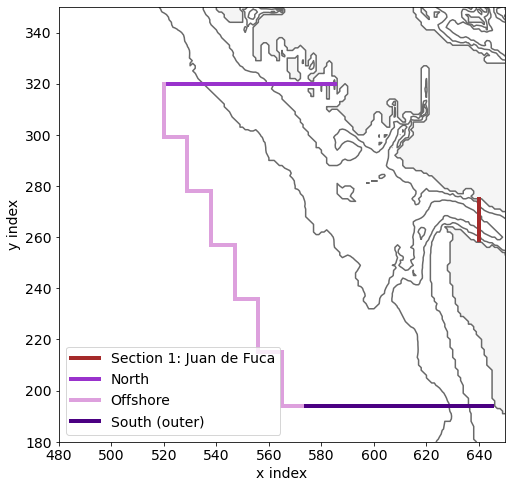

In [165]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# Make plot area
# xlim, ylim = [-125.5, -122], [47.7, 49]
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgrey')
ax.set_ylim([180,350])
ax.set_xlim([480,650])
ax.set_ylabel('y index')
ax.set_xlabel('x index')

c = ax.contour(mesh.mbathy[0,:,:]*10, levels=[200,300],extend='max', colors='dimgrey')
ax.clabel(c, inline=1, fontsize=100)

# Add cross-sections
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([520,585],[320,320], 'darkorchid',linewidth=4, label='North')
ax.plot([520,520],[320,299], 'plum',linewidth=4, label='Offshore')
ax.plot([529,520],[299,299], 'plum',linewidth=4)
ax.plot([529,529],[299,278], 'plum',linewidth=4)
ax.plot([529,538],[278,278], 'plum',linewidth=4)
ax.plot([538,538],[257,278], 'plum',linewidth=4)
ax.plot([547,538],[257,257], 'plum',linewidth=4)
ax.plot([547,547],[257,236], 'plum',linewidth=4)
ax.plot([547,556],[236,236], 'plum',linewidth=4)
ax.plot([556,556],[215,236], 'plum',linewidth=4)
ax.plot([565,556],[215,215], 'plum',linewidth=4)
ax.plot([565,565],[215,194], 'plum',linewidth=4)
ax.plot([565,574],[194,194], 'plum',linewidth=4)
ax.plot([574,645],[194,194], 'indigo',linewidth=4, label='South (outer)')
ax.legend(loc='lower left')